In [1]:
import pandas as pd
df = pd.read_csv('../../data processing/reduced_dataset.csv')
pd.set_option("display.max_columns", None)
df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,RainTomorrow
0,0.749989,1.230099,-2.093426,-0.298704,0.536319,0.481063,-1.064279,0.217299,-1.220448,-1.194645,1.970566,-0.312113,-0.065709,False
1,1.007009,-0.052832,-2.698468,-1.253686,0.384879,0.264372,-1.472700,-0.093843,-0.826070,-0.979376,1.495448,0.800856,0.987330,False
2,1.614931,1.042818,-1.918554,0.034041,-0.769160,0.998345,-1.182415,-0.221554,-1.643123,-0.345244,1.611492,-0.095412,0.692029,False
3,2.346759,-2.545315,0.220300,0.442592,0.807228,1.385255,-2.293140,0.289938,1.331965,1.334661,-0.895851,-0.577264,0.752065,False
4,1.170310,1.643348,-0.231587,-1.855438,-0.417431,2.028205,-1.078809,-0.647345,-0.709093,-0.462753,-0.012471,-0.994412,-1.481143,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0.083345,-3.717788,0.178347,1.472794,1.058897,1.243298,0.465545,1.173320,-1.592043,0.183161,0.240572,0.156753,0.381497,False
145456,0.017594,-2.530976,-1.493767,-0.974144,0.510472,2.001109,0.665878,-0.344729,1.313493,-2.063659,-0.013646,-1.574120,-0.178437,False
145457,0.724006,-2.186203,-1.345398,-0.704922,0.761860,1.646034,0.585660,0.136316,0.549115,-1.498885,1.335171,-1.344210,-0.173701,False
145458,1.138285,-2.773773,-0.737175,-0.401409,1.367802,1.104264,0.423048,0.634580,-0.788424,-1.277074,-0.189990,-0.625883,-0.236861,False


In [2]:
X = df.drop(["RainTomorrow"], axis=1)
Y = df["RainTomorrow"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)


In [3]:
len(X.columns)

13

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
from xgboost import XGBClassifier
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = XGBClassifier(**params_xgb)

In [6]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

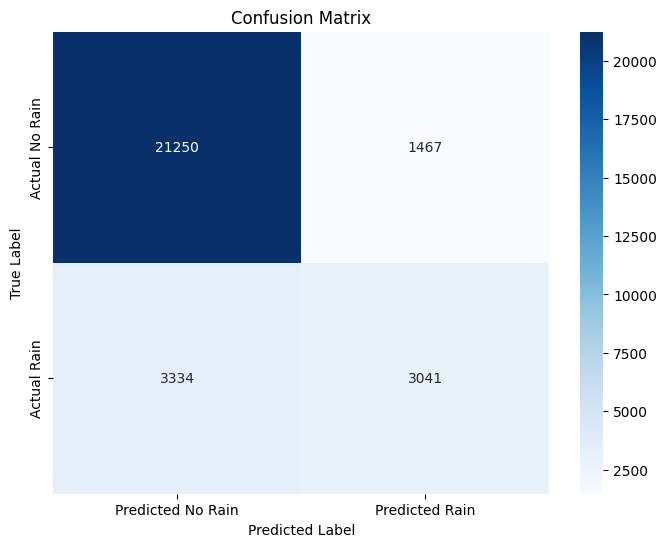

              precision    recall  f1-score   support

       False    0.86438   0.93542   0.89850     22717
        True    0.67458   0.47702   0.55885      6375

    accuracy                        0.83497     29092
   macro avg    0.76948   0.70622   0.72868     29092
weighted avg    0.82279   0.83497   0.82407     29092



In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
y_pred = model_xgb.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted No Rain', 'Predicted Rain'],
            yticklabels=['Actual No Rain', 'Actual Rain'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(classification_report(y_test,y_pred,digits=5))

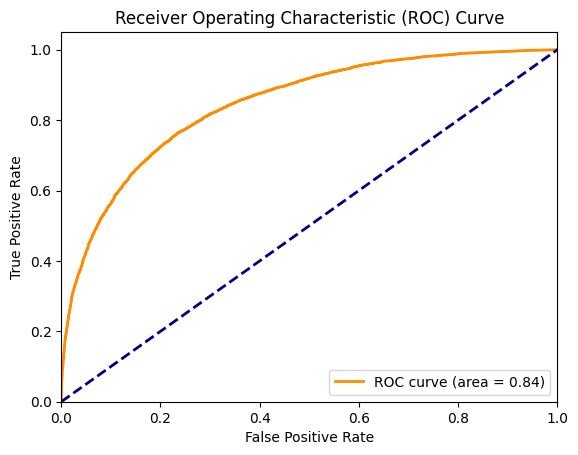

In [8]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = model_xgb.predict_proba(X_test)

positive_class_proba = y_pred_proba[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, positive_class_proba)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()